In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading corresponding point coordinates from file
==

In [223]:
df2=pd.read_csv('testing-points2.csv',header=None,index_col=0)

This is the 2D case
---

we are looking to find a Transformation Matrix from 4 corresponding 2D points.
Print the points, column 1 & 2 are the source and columns 3 & 4 are the target

In [235]:
df2

1         2          3          4
0                                          
1  14029.64  12786.84  19405.518  23159.823
2  14914.63  12535.56  20291.232  22909.817
3  14771.83  11404.66  20150.035  21778.202
4  13221.62  11840.32  18598.550  22211.755

plot the point locations of the source coordinate system (cols 1 & 2)

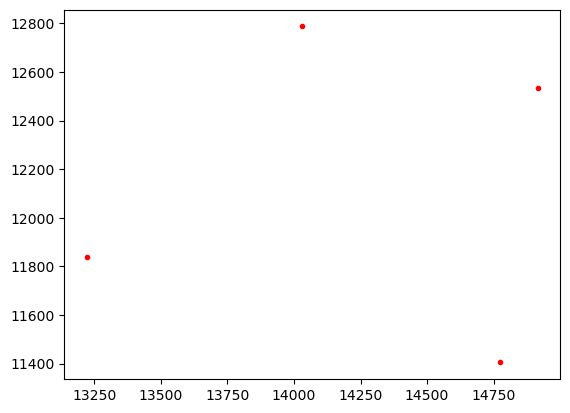

In [217]:
plt.plot(df2.iloc[:][1],df2.iloc[:][2],'r.')

In [221]:
df3=pd.read_csv('testing-points2a.csv',header=None, index_col=0)

In [222]:
df3

1         2
0                     
1   14029.64  12786.84
2   14914.63  12535.56
3   14771.83  11404.66
4   13221.62  11840.32
13  14735.09  12127.38
14  14253.84  11923.95
15  13603.74  11836.70
16  14291.76  12495.31
17  13931.50  12307.61

In [226]:
plt.plot(df2.iloc[:][1],df2.iloc[:][2],'bo',df3.iloc[:][1],df3.iloc[:][2],'r.')

to estimate the transformation matrix between the points we can use a homogenous coordinates approach  and model a least squares solution. **M** is the Design-Matrix for the Least Squares Ajustment while **l** holds the target coordinates. For each point we can create 3 rows in the Design matrix and in the **l-vector** in the following manner:

In [234]:
M=np.zeros((12,9))
l=np.zeros((12,1))


l[0:2,0]=df2.iloc[0][2:]
l[2,0]= 1
l[3:5,0]=df2.iloc[1][2:]
l[5,0]= 1
l[6:8,0]=df2.iloc[2][2:]
l[8,0]= 1
l[9:11,0]=df2.iloc[3][2:]
l[11,0]= 1

print(l)

[[19405.518]
 [23159.823]
 [    1.   ]
 [20291.232]
 [22909.817]
 [    1.   ]
 [20150.035]
 [21778.202]
 [    1.   ]
 [18598.55 ]
 [22211.755]
 [    1.   ]]


In [236]:
# Design Matrix for Affin Transformation
for i in range(4):
    M[3*i,:2]= df2.iloc[i][0:2]
    M[3*i,2] =  1
    M[3*i+1,3:5]= df2.iloc[i][0:2]
    M[3*i+1,5] =  1
    M[3*i+2,6:8]= df2.iloc[i][0:2]
    M[3*i+2,8] = 1

This Design-Matrix is representing a model to estimate the coefficiants of an Affin-Transformation.

In [237]:
print(M)

[[14029.64 12786.84     1.       0.       0.       0.       0.       0.
      0.  ]
 [    0.       0.       0.   14029.64 12786.84     1.       0.       0.
      0.  ]
 [    0.       0.       0.       0.       0.       0.   14029.64 12786.84
      1.  ]
 [14914.63 12535.56     1.       0.       0.       0.       0.       0.
      0.  ]
 [    0.       0.       0.   14914.63 12535.56     1.       0.       0.
      0.  ]
 [    0.       0.       0.       0.       0.       0.   14914.63 12535.56
      1.  ]
 [14771.83 11404.66     1.       0.       0.       0.       0.       0.
      0.  ]
 [    0.       0.       0.   14771.83 11404.66     1.       0.       0.
      0.  ]
 [    0.       0.       0.       0.       0.       0.   14771.83 11404.66
      1.  ]
 [13221.62 11840.32     1.       0.       0.       0.       0.       0.
      0.  ]
 [    0.       0.       0.   13221.62 11840.32     1.       0.       0.
      0.  ]
 [    0.       0.       0.       0.       0.       0.   13221.62 11840

computing the least-squares solution and reshaping the (9,1) vector result in a homogenous (3x3) Matrix including the 2x2 Rotation-Matrix and a 2x1 Translation-Vector

In [238]:
np.dot(np.linalg.inv(np.dot(M.T,M)) ,np.dot(M.T,l)).reshape(3,3)

array([[    1.000409,    -0.001465,  5388.875615],
       [    0.001493,     1.000406, 10346.870925],
       [   -0.      ,    -0.      ,     1.      ]])

In [239]:
T=np.dot(np.linalg.inv(np.dot(M.T,M)) ,np.dot(M.T,l)).reshape(3,3)

**T** is the **homogenous Transformation Matrix** 

to perform the Transformation of the point list we need to make all the points homogenous first.

In [241]:
df3['3']=np.ones(9)

In [246]:
np.set_printoptions(precision=3,suppress = True)

In [248]:
np.dot(T,df3.T).T[:,0:2]

array([[19405.515, 23159.85 ],
       [20291.235, 22909.79 ],
       [20150.033, 21778.218],
       [18598.552, 22211.739],
       [20112.22 , 22501.176],
       [19631.071, 22296.945],
       [18980.833, 22208.689],
       [19668.169, 22868.593],
       [19308.037, 22680.279]])

This is the resulting pointlist of the approach. 

To estimate the Transformation parameters with a more simple Helmert Transformation model we can perform the following steps:

In [249]:
M=np.zeros((12,9))
l=np.zeros((12,1))


l[0:2,0]=df2.iloc[0][2:]
l[2,0]= 1
l[3:5,0]=df2.iloc[1][2:]
l[5,0]= 1
l[6:8,0]=df2.iloc[2][2:]
l[8,0]= 1
l[9:11,0]=df2.iloc[3][2:]
l[11,0]= 1

print(l)

[[19405.518]
 [23159.823]
 [    1.   ]
 [20291.232]
 [22909.817]
 [    1.   ]
 [20150.035]
 [21778.202]
 [    1.   ]
 [18598.55 ]
 [22211.755]
 [    1.   ]]


In [260]:
df2.iloc[1][:]

1    14914.630
2    12535.560
3    20291.232
4    22909.817
Name: 2, dtype: float64

In [309]:
# Design Matrix for Helmert Transformation
for i in range(4):
    M[3*i,0]= df2.iloc[i][1]
    M[3*i,1]= df2.iloc[i][2]
    M[3*i,2] =  1
    M[3*i+1,0]= df2.iloc[i][2]
    M[3*i+1,1]= -df2.iloc[i][1]
    M[3*i+1,5] =  1
    M[3*i+2,6:8]= df2.iloc[i][0:2]
    M[3*i+2,8] = 1

In [310]:
print(M)

[[ 14029.64  12786.84      1.        0.        0.        0.        0.
       0.        0.  ]
 [ 12786.84 -14029.64      0.        0.        0.        1.        0.
       0.        0.  ]
 [     0.        0.        0.        0.        0.        0.    14029.64
   12786.84      1.  ]
 [ 14914.63  12535.56      1.        0.        0.        0.        0.
       0.        0.  ]
 [ 12535.56 -14914.63      0.        0.        0.        1.        0.
       0.        0.  ]
 [     0.        0.        0.        0.        0.        0.    14914.63
   12535.56      1.  ]
 [ 14771.83  11404.66      1.        0.        0.        0.        0.
       0.        0.  ]
 [ 11404.66 -14771.83      0.        0.        0.        1.        0.
       0.        0.  ]
 [     0.        0.        0.        0.        0.        0.    14771.83
   11404.66      1.  ]
 [ 13221.62  11840.32      1.        0.        0.        0.        0.
       0.        0.  ]
 [ 11840.32 -13221.62      0.        0.        0.        1.     

This Matrix has two cols with only zeros which results in the Determinat equal to zero.
So deleting the two zero-cols will fix the problem and make us compute the inverse in the adjustment. 

In [311]:
M1=np.delete(M, 3, 1)
M2=np.delete(M1, 3, 1)

In [325]:
print(M2)
print(M2.shape)

[[ 14029.64  12786.84      1.        0.        0.        0.        0.  ]
 [ 12786.84 -14029.64      0.        1.        0.        0.        0.  ]
 [     0.        0.        0.        0.    14029.64  12786.84      1.  ]
 [ 14914.63  12535.56      1.        0.        0.        0.        0.  ]
 [ 12535.56 -14914.63      0.        1.        0.        0.        0.  ]
 [     0.        0.        0.        0.    14914.63  12535.56      1.  ]
 [ 14771.83  11404.66      1.        0.        0.        0.        0.  ]
 [ 11404.66 -14771.83      0.        1.        0.        0.        0.  ]
 [     0.        0.        0.        0.    14771.83  11404.66      1.  ]
 [ 13221.62  11840.32      1.        0.        0.        0.        0.  ]
 [ 11840.32 -13221.62      0.        1.        0.        0.        0.  ]
 [     0.        0.        0.        0.    13221.62  11840.32      1.  ]]
(12, 7)


In [323]:
np.set_printoptions(precision=3,suppress = True)

In [313]:
h=np.dot(np.linalg.inv(np.dot(M2.T,M2)) ,np.dot(M2.T,l))
print(h.shape)
print(h)

(7, 1)
[[    1.000408]
 [   -0.001482]
 [ 5389.091319]
 [10347.006104]
 [   -0.      ]
 [   -0.      ]
 [    1.      ]]


In [318]:
h1=np.insert(h,3,-h[1,0],0)
h2=np.insert(h1,4,h[0,0],0)

In [319]:
h2

array([[    1.000408],
       [   -0.001482],
       [ 5389.091319],
       [    0.001482],
       [    1.000408],
       [10347.006104],
       [   -0.      ],
       [   -0.      ],
       [    1.      ]])

In [320]:
T=h2.reshape(3,3)

In [321]:
T

array([[    1.000408,    -0.001482,  5389.091319],
       [    0.001482,     1.000408, 10347.006104],
       [   -0.      ,    -0.      ,     1.      ]])

In [324]:
np.dot(T,df3.T).T[:,0:2]

array([[19405.504, 23159.854],
       [20291.228, 22909.783],
       [20150.045, 21778.21 ],
       [18598.557, 22211.75 ],
       [20112.219, 22501.17 ],
       [19631.075, 22296.944],
       [18980.839, 22208.695],
       [19668.163, 22868.593],
       [19308.035, 22680.283]])

Reading corresponding point coordinates from file
==

In [131]:
df=pd.read_csv('testing-points1.csv',header=None)

This is the 3D case
---

we are looking to find a Transformation Matrix from 4 corresponding 3D points

In [132]:
df

0      1      2     3       4        5      6
0  p1 -17.40   7.41 -0.54  3241.8  10119.0  31.82
1  p2 -30.84 -12.32 -0.43  3219.8  10128.0  31.82
2  p3 -16.94 -16.58 -0.47  3218.6  10113.0  31.72
3  p4 -30.49 -36.61  0.29  3196.0  10122.0  31.73

In [133]:
df.iloc[0][4]

3241.8

In [134]:
M=np.zeros((16,16))
l=np.zeros((16,1))

In [135]:
l.shape
np.set_printoptions(precision=4,suppress = True)

In [136]:
l[0:3,0]=df.iloc[0][4:7]
l[3,0]= 1
l[4:7,0]=df.iloc[1][4:7]
l[7,0]= 1
l[8:11,0]=df.iloc[2][4:7]
l[11,0]= 1
l[12:15,0]=df.iloc[3][4:7]
l[15,0]= 1
print(l)

[[ 3241.8 ]
 [10119.  ]
 [   31.82]
 [    1.  ]
 [ 3219.8 ]
 [10128.  ]
 [   31.82]
 [    1.  ]
 [ 3218.6 ]
 [10113.  ]
 [   31.72]
 [    1.  ]
 [ 3196.  ]
 [10122.  ]
 [   31.73]
 [    1.  ]]


In [137]:
M[0,:3]= df.iloc[0][1:4]
M[0,3] = 1

M[1,4:7]= df.iloc[0][1:4]
M[1,7]  = 1

M[2,8:11]= df.iloc[0][1:4]
M[2,11]  = 1

M[3,12:15]= df.iloc[0][1:4]
M[3,15] = 1

M[4,:3]= df.iloc[1][1:4]
M[4,3] =  1

M[5,4:7]= df.iloc[1][1:4]
M[5,7] =  1

M[6,8:11]= df.iloc[1][1:4]
M[6,11] = 1

M[7,12:15]=df.iloc[1][1:4]
M[7,15] = 1


M[8,:3]= df.iloc[2][1:4]
M[8,3] =  1

M[9,4:7]= df.iloc[2][1:4]
M[9,7] =  1

M[10,8:11]= df.iloc[2][1:4]
M[10,11] = 1

M[11,12:15]= df.iloc[2][1:4]
M[11,15] =  1


M[12,:3]= df.iloc[3][1:4]
M[12,3] = 1

M[13,4:7]= df.iloc[3][1:4]
M[13,7] =  1

M[14,8:11]= df.iloc[3][1:4]
M[14,11] =  1

M[15,12:15]= df.iloc[3][1:4]
M[15,15] = 1


print(M[0:16,0:10])

[[-17.4    7.41  -0.54   1.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.   -17.4    7.41  -0.54   1.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.   -17.4    7.41]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [-30.84 -12.32  -0.43   1.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.   -30.84 -12.32  -0.43   1.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.   -30.84 -12.32]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [-16.94 -16.58  -0.47   1.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.   -16.94 -16.58  -0.47   1.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.   -16.94 -16.58]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [-30.49 -36.61   0.29   1.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.   -30.49 -36.61   0.29 

In [138]:
np.dot(np.linalg.inv(np.dot(M.T,M)) ,np.dot(M.T,l))

array([[    0.2096],
       [    0.9698],
       [   -0.44  ],
       [ 3238.0236],
       [   -1.0087],
       [    0.2306],
       [   -0.0643],
       [10099.7061],
       [   -0.0059],
       [    0.0041],
       [    0.0163],
       [   31.6959],
       [    0.    ],
       [    0.    ],
       [    0.    ],
       [    1.    ]])

In [139]:
U,S,V=np.linalg.svd(M,full_matrices=True)

In [140]:
H=V[:16,16].reshape(4,4)

IndexError: index 16 is out of bounds for axis 1 with size 16

In [ ]:
H.T

In [ ]:
np.dot(np.linalg.inv(np.dot(M.T,M)) ,np.dot(M.T,l)).reshape(4,4)

In [ ]:
0.21095277662308629 0.9774781497556848 -0.00594918357528593 23238.318780198064 

-0.9774332258657229 0.21100438075203337 0.01007175640974158 30100.055196603218 

0.011100225616467532 0.0036902647131527543 0.9999315811282344 32.53070599039722 

0 0 0 1"